# Standard RB Demo

This is a very basic implemention of a standard RB experiment

*NOTE: the circuit generation code of this demo is quite slow*

In [1]:
import numpy as np
import qiskit_experiments as qe
rb = qe.randomized_benchmarking

# For simulation
from qiskit.test.mock import FakeParis
backend = FakeParis()

## Running 1-qubit RB

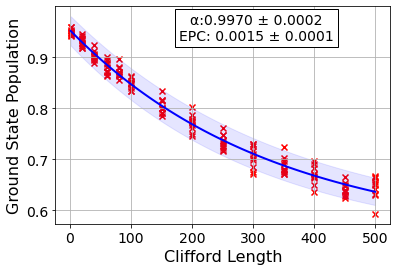

---------------------------------------------------
Experiment: RBExperiment
Experiment ID: bf82d345-8697-4a02-b900-3d0ce6ed8dd0
Status: COMPLETE
Circuits: 140
Analysis Results: 1
---------------------------------------------------
Last Analysis Result
- popt: [0.40721409 0.99699513 0.545793  ]
- popt_err: [0.0139231  0.00019386 0.01476543]
- pcov: [[ 1.93852838e-04  2.56122914e-06 -2.03937405e-04]
 [ 2.56122914e-06  3.75829374e-08 -2.78596632e-06]
 [-2.03937405e-04 -2.78596632e-06  2.18017934e-04]]
- chisq: 0.0001899187889430775
- EPC: 0.001502434393951868
- EPC_err: 9.722374078124937e-05
- plabels: ['A', 'alpha', 'B']

In [3]:
lengths = [1, 20, 40, 60, 80, 100, 150, 200, 250, 300, 350, 400, 450, 500]
num_samples = 10
seed = 1010

# Run an RB experiment on qubit 0
exp1 = rb.RBExperiment([0], lengths, num_samples=num_samples, seed=seed)
expdata1 = exp1.run(backend)

# View result data
expdata1

## Running 2-qubit RB

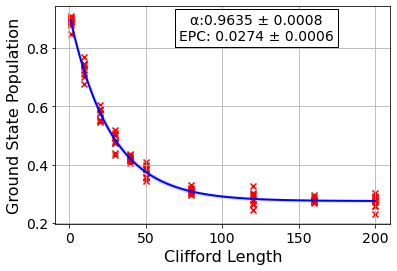

---------------------------------------------------
Experiment: RBExperiment
Experiment ID: a66edc35-6858-4bd6-bdbf-caa13028e2a8
Status: COMPLETE
Circuits: 100
Analysis Results: 1
---------------------------------------------------
Last Analysis Result
- popt: [0.64140585 0.96351409 0.27553952]
- popt_err: [0.00525204 0.00076852 0.00350417]
- pcov: [[ 2.75838846e-05  3.19166240e-08 -1.00673219e-05]
 [ 3.19166240e-08  5.90616547e-07 -1.70938307e-06]
 [-1.00673219e-05 -1.70938307e-06  1.22792380e-05]]
- plabels: ['A', 'alpha', 'B']
- chisq: 0.00018183203813990764
- EPC: 0.02736443278142847
- EPC_err: 0.0005982132096938247

In [3]:
lengths = [1, 10, 20, 30, 40, 50, 80, 120, 160, 200]
num_samples = 10
seed = 1010

# Run an RB experiment on qubits 0,
exp2 = rb.RBExperiment([0, 1], lengths, num_samples=num_samples, seed=seed)
expdata2 = exp2.run(backend)

# View result data
expdata2

## Running parallel RB experiments

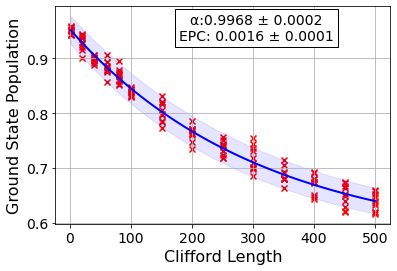

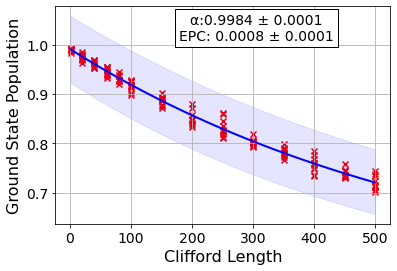

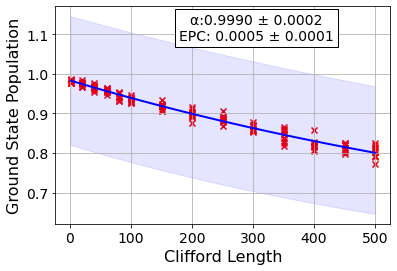

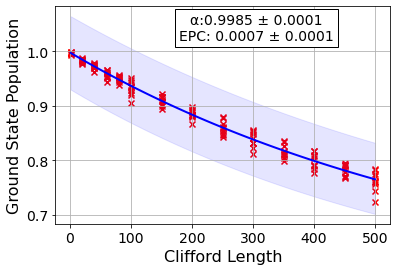

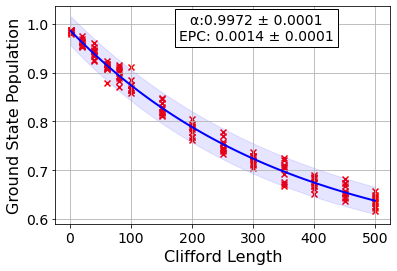

---------------------------------------------------
Experiment: ParallelExperiment
Experiment ID: 8607e114-c928-4b8a-9e60-8981e0f04f0d
Status: COMPLETE
Component Experiments: 5
Circuits: 140
Analysis Results: 1
---------------------------------------------------
Last Analysis Result
- experiment_types: ['RBExperiment', 'RBExperiment', 'RBExperiment', 'RBExperiment', 'RBExperiment']
- experiment_ids: ['ef609892-00f3-462e-a173-ba08507d994c', '50159be4-0fd4-4ba2-92f2-a5c56c2bb715', '8685ffdf-7518-4575-8c6f-d20bb8fbfd3e', 'f13af5cd-e8db-4df8-bf30-8909d232f51d', 'dd819f1a-3fcf-4b45-9251-301e244d88df']
- experiment_qubits: [(0,), (1,), (2,), (3,), (4,)]

In [4]:
lengths = [1, 20, 40, 60, 80, 100, 150, 200, 250, 300, 350, 400, 450, 500]
num_samples = 10
seed1 = 1010

exps = [rb.RBExperiment([i], lengths, num_samples=num_samples, seed=seed + i)
        for i in range(5)]

par_exp = qe.composite.ParallelExperiment(exps)
par_expdata = par_exp.run(backend)

# View result
par_expdata

#### Viewing sub experiment data

The experiment data returned from a batched experiment also contains individual experiment data for each sub experiment which can be accessed using `experiment_data(index)`

In [5]:
# Print sub-experiment data
for i in range(par_exp.num_experiments):
    print(par_expdata.component_experiment_data(i), '\n')

---------------------------------------------------
Experiment: RBExperiment
Experiment ID: ef609892-00f3-462e-a173-ba08507d994c
Status: COMPLETE
Circuits: 140
Analysis Results: 1
---------------------------------------------------
Last Analysis Result
- popt: [0.39137521 0.99678589 0.56133646]
- popt_err: [0.01227738 0.00019744 0.01307769]
- pcov: [[ 1.50734056e-04  2.27543123e-06 -1.58886313e-04]
 [ 2.27543123e-06  3.89817831e-08 -2.50197540e-06]
 [-1.58886313e-04 -2.50197540e-06  1.71025848e-04]]
- plabels: ['A', 'alpha', 'B']
- chisq: 0.00018901921296587515
- EPC: 0.0016070546444066913
- EPC_err: 9.903734120493081e-05 

---------------------------------------------------
Experiment: RBExperiment
Experiment ID: 50159be4-0fd4-4ba2-92f2-a5c56c2bb715
Status: COMPLETE
Circuits: 140
Analysis Results: 1
---------------------------------------------------
Last Analysis Result
- popt: [0.49566253 0.99841818 0.49588679]
- popt_err: [0.03353834 0.00014532 0.03390871]
- pcov: [[ 1.12482042e-03